# Derivation of Airfoil Coordinate Normal Functions

## Imports

In [62]:
import sympy as sym
import numpy as np
from sympy.vector import CoordSys3D
from sympy import lambdify
import matplotlib.pyplot as plt
from scipy.integrate import quad, simps
import scipy.interpolate as inter
%matplotlib inline

## Variables

In [3]:
x, a, b, c, d, e, t, c_a = sym.symbols('x a b c d e t c_a')
N = CoordSys3D('N')

## Symmetric Airfoil Equation

In [54]:
airfoil = x*N.i + c_a*5*t*(a*sym.sqrt(x) + b*x + c*sym.Pow(x, 2) + d*sym.Pow(x, 3) + e*sym.Pow(x, 4))*N.j
airfoil = airfoil.subs(x, x/c_a)
coeffs = {
    'a':0.2969,
    'b':-0.1260,
    'c':-0.3516,
    'd':0.2843,
    'e':-0.1015,
    't':0.12,
    'c_a':6*0.0254
}
airfoil = airfoil.subs(coeffs)

## Dicretized Airfoil Interpolation Function

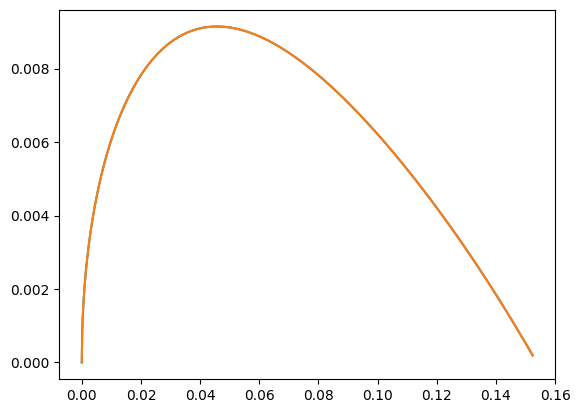

In [65]:
# Log Discretize the Space
x_l = np.geomspace(0.0001, coeffs['c_a'], num = 500)
x_l[0] = 0.0

# Get Airfoil Coordinates
a_f = lambdify(x, airfoil.coeff(N.j))
a_l = a_f(x_l)

# Interpolate the Data to Remove the Tangent Discontinuity
a_int = inter.InterpolatedUnivariateSpline(x_l, a_l)
t_int = a_int.derivative()

plt.plot(x_l, a_l)
plt.plot(x_l, a_int(x_l))
plt.show()

## Tangent Vector

In [41]:
tangent = sym.diff(airfoil, x)

In [42]:
tangent

6.56167979002625*N.i + (-68.821222506837*x**3 + 22.0332940665881*x**2 - 2.76850393700787*x - 0.0756 + 0.0347715408165931/sqrt(x))*N.j

## Normal Vector

In [43]:
normal = tangent.coeff(N.j)*N.i + -1*tangent.coeff(N.i)*N.j

In [44]:
unit_normal = normal/(normal.magnitude().simplify())

In [45]:
unit_normal

(0.0145304015763547*(-68.821222506837*x**3 + 22.0332940665881*x**2 - 2.76850393700787*x - 0.0756 + 0.0347715408165931/sqrt(x))/sqrt((0.00909044827683273*x + (sqrt(x)*(x**3 - 0.320152610837438*x**2 + 0.0402274739704433*x + 0.00109849835917241) - 0.000505244451493705)**2)/x))*N.i + (-0.095343842364532/sqrt((0.00909044827683273*x + (sqrt(x)*(x**3 - 0.320152610837438*x**2 + 0.0402274739704433*x + 0.00109849835917241) - 0.000505244451493705)**2)/x))*N.j

## Plotting/Testing

In [46]:
unit_normal = unit_normal.subs(coeffs)
tangent = tangent.subs(coeffs)

## Differential Area

In [52]:
dA = sym.sqrt(1 + sym.Pow(tangent.coeff(N.j), 2))
dA_f = lambdify(x, dA)
x_a = np.linspace(0.1, 6*0.0254, 10000)
S = quad(dA_f, 0, 6*0.0254)
S_s = simps(dA_f(x_a), x_a)
print(S, S_s)

(0.15539249837296928, 2.873035725992068e-09) 0.05274972233789182


In [18]:
fx_airfoil = lambdify(x, airfoil.coeff(N.i))
fy_airfoil = lambdify(x, airfoil.coeff(N.j))
fx_norm = lambdify(x, unit_normal.coeff(N.i))
fy_norm = lambdify(x, unit_normal.coeff(N.j))

[ 9.99998219e-01  1.76815508e-01  1.22317625e-01  9.76143893e-02
  8.26775682e-02  7.23577563e-02  6.46491012e-02  5.85866996e-02
  5.36413468e-02  4.94953768e-02  4.59450459e-02  4.28528673e-02
  4.01222538e-02  3.76830941e-02  3.54830959e-02  3.34823541e-02
  3.16498154e-02  2.99609020e-02  2.83958719e-02  2.69386590e-02
  2.55760364e-02  2.42970014e-02  2.30923157e-02  2.19541563e-02
  2.08758482e-02  1.98516552e-02  1.88766166e-02  1.79464163e-02
  1.70572786e-02  1.62058837e-02  1.53892987e-02  1.46049211e-02
  1.38504319e-02  1.31237568e-02  1.24230335e-02  1.17465844e-02
  1.10928930e-02  1.04605846e-02  9.84840939e-03  9.25522757e-03
  8.67999729e-03  8.12176367e-03  7.57964946e-03  7.05284686e-03
  6.54061041e-03  6.04225071e-03  5.55712890e-03  5.08465179e-03
  4.62426760e-03  4.17546210e-03  3.73775523e-03  3.31069806e-03
  2.89387010e-03  2.48687687e-03  2.08934771e-03  1.70093386e-03
  1.32130665e-03  9.50155924e-04  5.87188606e-04  2.32127385e-04
 -1.15290471e-04 -4.55314

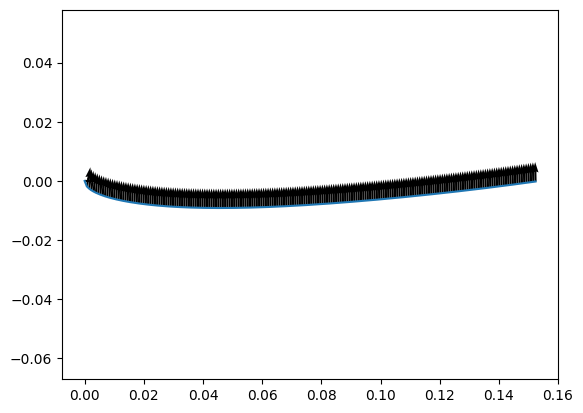

In [35]:
x_c = np.linspace(1e-10, 6*0.0254, 200)
y_c = -fy_airfoil(x_c)
x_n = fx_norm(x_c)
y_n = -fy_norm(x_c)
print(x_n)
plt.plot(x_c, y_c)
plt.quiver(x_c, y_c, x_n, y_n)
plt.axis('equal')
plt.show()